In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
from datetime import datetime
import datetime as dt
import itertools

In [2]:
# Determine if script uses eastern or utc timezone - for overnight runs
date_obj = datetime.now() if datetime.now().hour < 20 else datetime.utcnow()
folder_date = date_obj.strftime("%Y-%m-%d") 

# Set output file path
folder_output_loc =  f"C:/Users/NicholasBehrendt/Documents/Current Projects/Brighton/support-docs/data/"

In [3]:
# import data
fp = "C:/Users/NicholasBehrendt/Documents/Current Projects/Brighton/support-docs/data/"
file_str1 = "past_orders_operations.csv"
file_str2 = "past_orders_confirmations.csv"
file_name1 = fp+file_str1
file_name2 = fp+file_str2

operations = pd.read_csv(file_name1)
confirm = pd.read_csv(file_name2)

In [4]:
# clean data
confirm = confirm.dropna(subset=['Work Ctr'])
confirm['Work Ctr'] = confirm['Work Ctr'].astype(int)
confirm['Work Ctr'] = confirm['Work Ctr'].astype(str)

# filter last three months
confirm = confirm[pd.to_datetime(confirm['Postg date']) >= datetime(2022, 8, 1)]

In [5]:
# reassign default work centers to likely actual work centers
confirm['Work Ctr'] = np.where((confirm['Name'] == 'Nicholas A. Lierman') & (confirm['Work Ctr'] == '2012'), '2008', confirm['Work Ctr'])
confirm['Work Ctr'] = np.where((confirm['Name'] == 'Gerald H. Craig') & (confirm['Work Ctr'] == '2012'), '2007', confirm['Work Ctr'])
confirm['Work Ctr'] = np.where((confirm['Name'] == 'Brian J Perry') & (confirm['Work Ctr'] == '2012'), '2069', confirm['Work Ctr'])
confirm['Work Ctr'] = np.where((confirm['Name'] == 'Hector J Maldonado') & (confirm['Work Ctr'] == '2012'), '2009', confirm['Work Ctr'])
confirm['Work Ctr'] = np.where((confirm['Name'] == 'Robert L Bays') & (confirm['Work Ctr'] == '2012'), '2009', confirm['Work Ctr'])
confirm['Work Ctr'] = np.where((confirm['Name'] == 'Johnathan W.S. Meyers') & (confirm['Work Ctr'] == '2012'), '2008', confirm['Work Ctr'])
confirm['Work Ctr'] = np.where((confirm['Name'] == 'Thomas Kunkel') & (confirm['Work Ctr'] == '2012'), '2019', confirm['Work Ctr'])
confirm['Work Ctr'] = np.where((confirm['Name'] == 'Matthew D. Hurley') & (confirm['Work Ctr'] == '2012'), '2020', confirm['Work Ctr'])
confirm['Work Ctr'] = np.where((confirm['Name'] == 'Gerald H. Craig') & (confirm['Work Ctr'] == '2012'), '2007', confirm['Work Ctr'])
confirm['Work Ctr'] = np.where((confirm['Name'] == 'Ronald  Marcum') & (confirm['Work Ctr'] == '2012'), '2005', confirm['Work Ctr'])

In [6]:
# group orders by order number, activity, work center and sum hours
order_wc_act_hrs = confirm.groupby(by=['Order', 'Work Ctr', 'Activity'], as_index=False).sum('ConfirmedHours')
order_wc_hrs = confirm.groupby(by=['Order', 'Work Ctr'], as_index=False).sum('ConfirmedHours')

Text(0.5, 0.98, 'Hours per Activity Completed | 8/1-11/1')

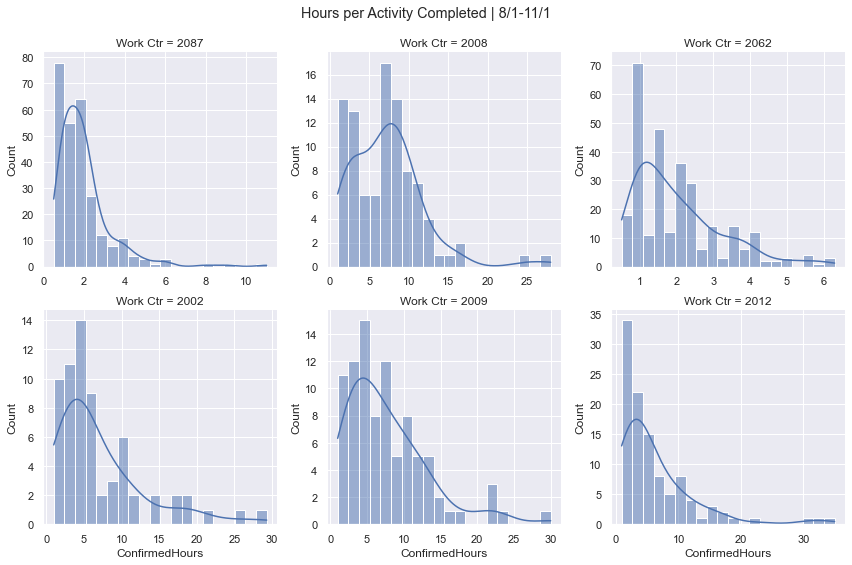

In [7]:
# Work center processing time distribution plots
    ## Processing times by activity completed
# sns.set(rc={'figure.facecolor':'white'})
# g = sns.FacetGrid(order_wc_act_hrs, col="Work Ctr", col_wrap=3, height=4, sharex=False, sharey=False)
# g.map(sns.histplot, 'ConfirmedHours', bins=20, kde=True)
# g.fig.subplots_adjust(top=0.97)
# g.fig.suptitle('Hours per Activity Completed')

# Work center processing time distribution plots
    ## Processing times by activity completed
    ## Flanging only

# Flange and pickle work centers
flange = ['2002', '2008', '2009', '2012', '2062', '2087']
flange_order_act = order_wc_act_hrs[order_wc_act_hrs['Work Ctr'].isin(flange)]
flange_order_act = flange_order_act[(flange_order_act['ConfirmedHours'] > 0.5) & (flange_order_act['ConfirmedHours'] < 100)]

# Histograms
sns.set(rc={'figure.facecolor':'white'})
g = sns.FacetGrid(flange_order_act, col="Work Ctr", col_wrap=3, height=4, sharex=False, sharey=False)
g.map(sns.histplot, 'ConfirmedHours', bins=20, kde=True)
g.fig.subplots_adjust(top=0.90)
g.fig.suptitle('Hours per Activity Completed | 8/1-11/1')

Text(0.5, 0.98, 'Hours per Order Completed | 8/1 - 11/1')

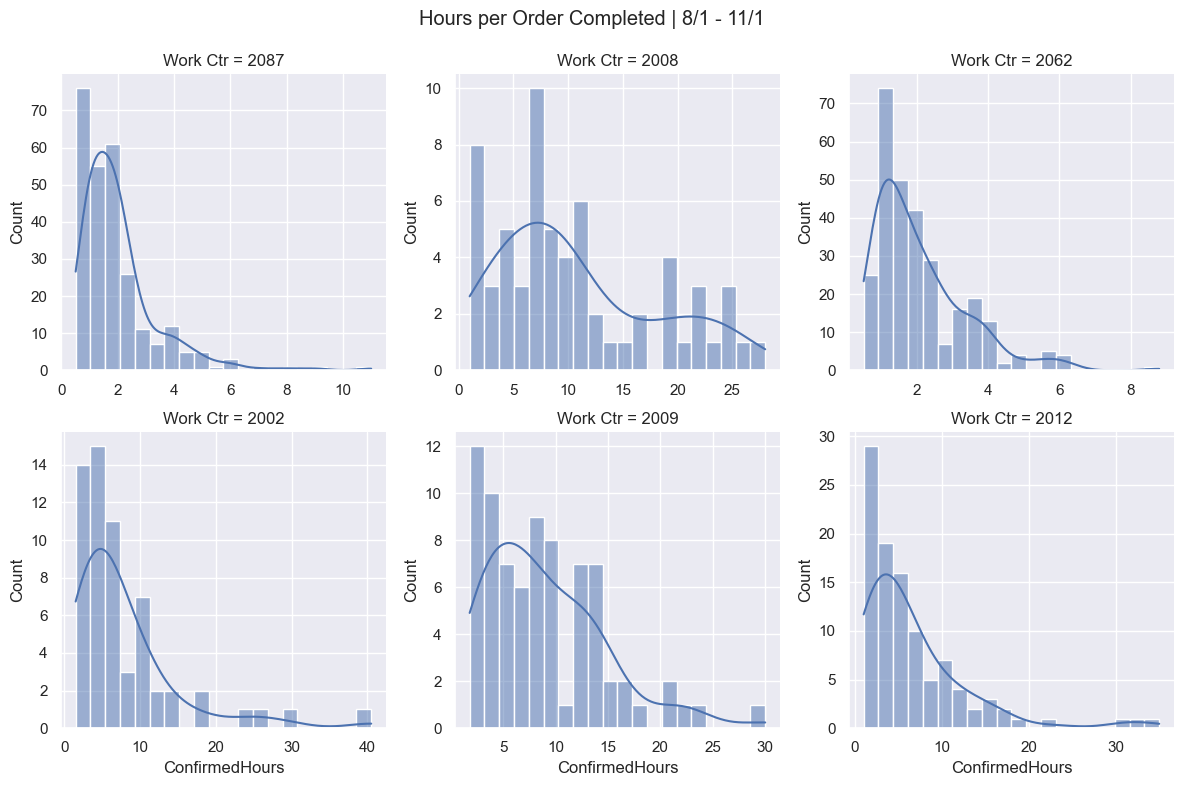

In [8]:
# Work center processing time distribution plots
    ## Processing times by order completed
# sns.set(rc={'figure.facecolor':'white'})
# g = sns.FacetGrid(order_wc_hrs, col="Work Ctr", col_wrap=3, height=4, sharex=False, sharey=False)
# g.map(sns.histplot, 'ConfirmedHours', bins=20, kde=True)
# g.fig.subplots_adjust(top=0.97)
# g.fig.suptitle('Hours per Order Completed')

# Work center processing time distribution plots
    ## Processing times by order completed
    ## Flanging only

# Flange and pickle work centers
flange = ['2002', '2008', '2009', '2012', '2062', '2087']
flange_order = order_wc_hrs[order_wc_hrs['Work Ctr'].isin(flange)]
flange_order = flange_order[(flange_order['ConfirmedHours'] > 0.5) & (flange_order['ConfirmedHours'] < 100)]

# Histograms
sns.set(rc={'figure.facecolor':'white'})
g = sns.FacetGrid(flange_order, col="Work Ctr", col_wrap=3, height=4, sharex=False, sharey=False)
g.map(sns.histplot, 'ConfirmedHours', bins=20, kde=True)
g.fig.subplots_adjust(top=0.90)
g.fig.suptitle('Hours per Order Completed | 8/1 - 11/1')

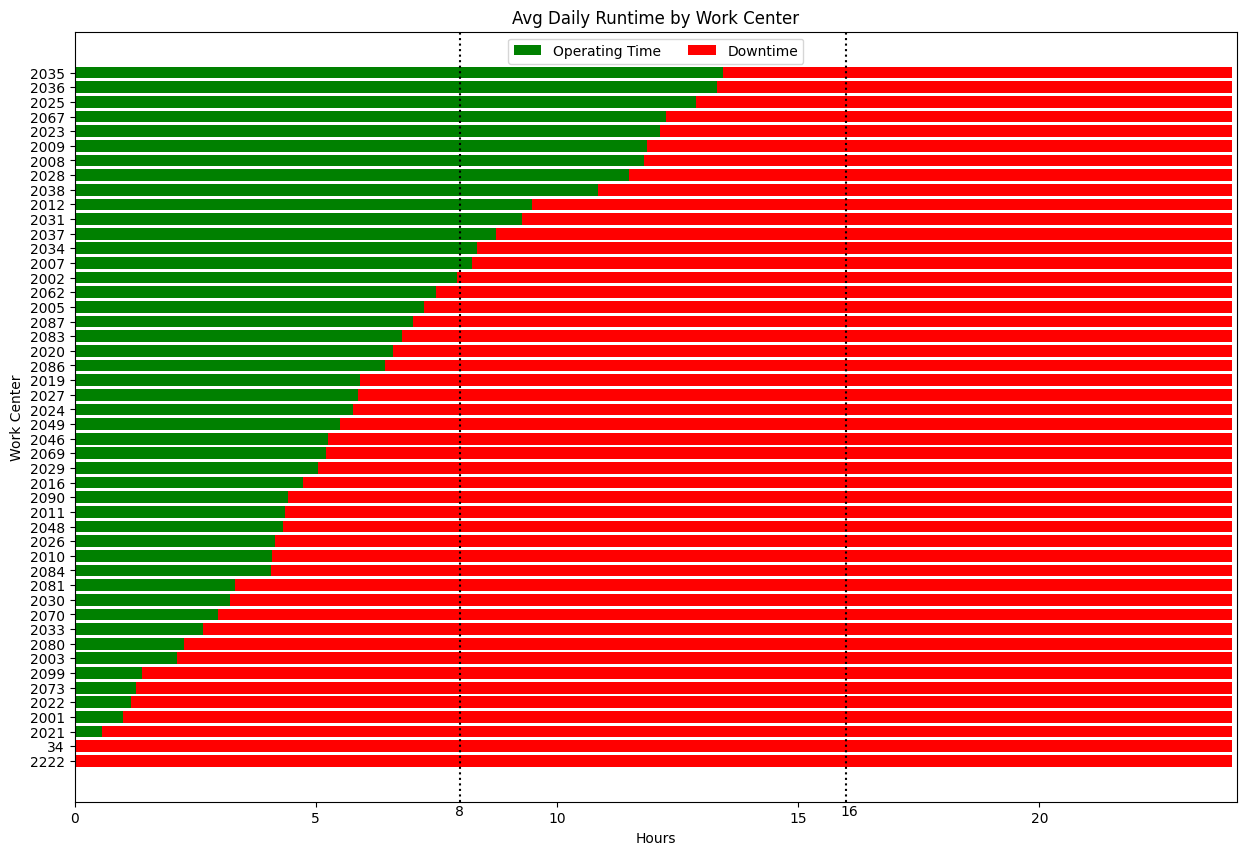

In [9]:
# Work center hours per day
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

hrs_per_day = confirm.groupby(by=['Work Ctr', 'Postg date'], as_index=False).sum('ConfirmedHours')
hrs_per_day = hrs_per_day[['Work Ctr', 'Postg date', 'ConfirmedHours']]
hrs_per_day['ConfirmedHours'][hrs_per_day['ConfirmedHours'] > 24] = 24 ### Assign 24 hrs when > 24, for hours spanning multiple days

# compute average by work center, calculate downtime
avg_per_day = hrs_per_day.groupby(by=['Work Ctr'], as_index=False).mean('ConfirmedHours')
avg_per_day['Downtime'] = 24 - avg_per_day['ConfirmedHours']

# sort for plot
avg_per_day = avg_per_day.sort_values(by=['ConfirmedHours'], ascending=True)
avg_per_day

# plot values
x = avg_per_day['Work Ctr']
y1 = avg_per_day['ConfirmedHours']
y2 = avg_per_day['Downtime']

# plot size
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)

# plot horixontal bar
plt.barh(x, y1, color='green', label='Operating Time')
plt.barh(x, y2, left=y1, color='red', label='Downtime')
plt.xlim(0,24.1)
plt.title('Avg Daily Runtime by Work Center')
plt.ylabel('Work Center')
plt.xlabel('Hours')
plt.legend(ncol=2, loc='upper center')

# reference lines
plt.axvline(x = 8, color = 'black', linestyle='dotted')
plt.axvline(x = 16, color = 'black', linestyle='dotted')

plt.text(7.88, -3.7, '8')
plt.text(15.88, -3.7, '16')

plt.show()

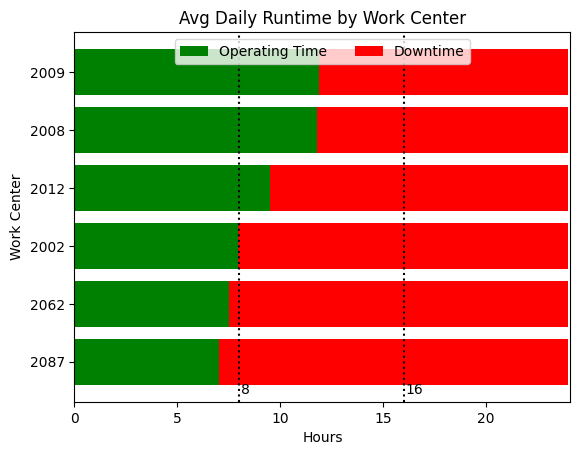

In [10]:
# Work center hours per day
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

# Flanging and pickle only
flange = ['2002', '2008', '2009', '2012', '2062', '2087']
flange_hrs = confirm[confirm['Work Ctr'].isin(flange)]

hrs_per_day = flange_hrs.groupby(by=['Work Ctr', 'Postg date'], as_index=False).sum('ConfirmedHours')
hrs_per_day = hrs_per_day[['Work Ctr', 'Postg date', 'ConfirmedHours']]
hrs_per_day['ConfirmedHours'][hrs_per_day['ConfirmedHours'] > 24] = 24 ### Assign 24 hrs when > 24, for hours spanning multiple days

# compute average by work center, calculate downtime
avg_per_day = hrs_per_day.groupby(by=['Work Ctr'], as_index=False).mean('ConfirmedHours')
avg_per_day['Downtime'] = 24 - avg_per_day['ConfirmedHours']

# sort for plot
avg_per_day = avg_per_day.sort_values(by=['ConfirmedHours'], ascending=True)
avg_per_day

# plot values
x = avg_per_day['Work Ctr']
y1 = avg_per_day['ConfirmedHours']
y2 = avg_per_day['Downtime']

# plot size
f = plt.figure()
#f.set_figwidth(15)
#f.set_figheight(10)
f.tight_layout()

# plot horixontal bar
plt.barh(x, y1, color='green', label='Operating Time')
plt.barh(x, y2, left=y1, color='red', label='Downtime')
plt.xlim(0,24.1)
plt.title('Avg Daily Runtime by Work Center')
plt.ylabel('Work Center')
plt.xlabel('Hours')
plt.legend(ncol=2, loc='upper center')

# reference lines
plt.axvline(x = 8, color = 'black', linestyle='dotted')
plt.axvline(x = 16, color = 'black', linestyle='dotted')

plt.text(8.1, -0.55, '8') # 7.88
plt.text(16.1, -0.55, '16') # 15.88

plt.show()

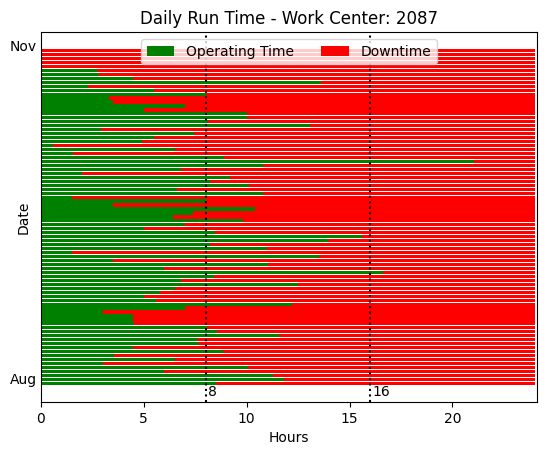

In [14]:
# Work center hours per day
# Work center hours per day -- all observations
#matplotlib.rcParams.update(matplotlib.rcParamsDefault)

wc = '2087'
wc_hours = confirm[confirm['Work Ctr'] == wc]

wc_hrs_per_day = wc_hours.groupby(by=['Postg date'], as_index=False).sum('ConfirmedHours')
wc_hrs_per_day
wc_hrs_per_day = wc_hrs_per_day[['Postg date', 'ConfirmedHours']]
wc_hrs_per_day['ConfirmedHours'][wc_hrs_per_day['ConfirmedHours'] > 24] = 24 ### Assign 24 hrs when > 24, for hours spanning multiple days

# # compute average by work center, calculate downtime
# avg_per_day = hrs_per_day.groupby(by=['Work cntr.'], as_index=False).mean('Actual Processing Time')
wc_hrs_per_day['Downtime'] = 24 - wc_hrs_per_day['ConfirmedHours']

wc_hrs_per_day['Postg date'] = pd.to_datetime(wc_hrs_per_day['Postg date'])
wc_hrs_per_day = wc_hrs_per_day.sort_values(by=['Postg date'], ascending=True)
wc_hrs_per_day['Postg date'] = wc_hrs_per_day['Postg date'].astype(str)

# plot values
x = wc_hrs_per_day['Postg date']
y1 = wc_hrs_per_day['ConfirmedHours']
y2 = wc_hrs_per_day['Downtime']

# plot size
f = plt.figure()
#f.set_figwidth(15)
#f.set_figheight()
f.tight_layout
# X = 10*np.random.rand(5,3)
# plt.imshow(X, aspect='auto')

# plot horixontal bar
plt.barh(x, y1, color='green', label='Operating Time')
plt.barh(x, y2, left=y1, color='red', label ='Downtime')
plt.xlim(0,24.1)
plt.title('Daily Run Time - Work Center: ' + wc)
plt.ylabel('Date')
plt.xlabel('Hours')
plt.legend(ncol=2, loc='upper center')
plt.yticks([])

# reference lines
plt.axvline(x = 8, color = 'black', linestyle='dotted')
plt.axvline(x = 16, color = 'black', linestyle='dotted')

plt.text(8.1, -3.1, '8') # 7.88
plt.text(16.1, -3.1, '16') # 15.88
plt.text(-1.5, 0, 'Aug')
plt.text(-1.5, len(x)-1, 'Nov')

plt.show()

In [15]:
# Work Center Distribution Lists
confirm = confirm[confirm['ConfirmedHours'] > 0.5]

# define flange bottleneck machines
flange = ['2002', '2008', '2009', '2012', '2062', '2087']

# work center run times
    # run times by order

# initialize work center dictionaries
wc_order_dict = dict.fromkeys(flange)

# sum hours per work center (by order)
wc_order_time = confirm.groupby(by=['Work Ctr', 'Order'], as_index=False).sum('ConfirmedHours')

# iterate through work centers
for wc in flange:
    temp_times = wc_order_time[wc_order_time['Work Ctr'] == wc]['ConfirmedHours']
    wc_order_dict[wc] = temp_times


# work center run times
    # run times by activity

# initialize work center dictionaries
wc_activity_dict = dict.fromkeys(flange)

# sum hours per work center (by activity)
wc_activity_time = confirm.groupby(by=['Work Ctr', 'Order', 'Activity'], as_index=False).sum('ConfirmedHours')

# iterate through work centers
for wc in flange:
    temp_times = wc_activity_time[wc_activity_time['Work Ctr'] == wc]['ConfirmedHours']
    wc_activity_dict[wc] = temp_times

In [16]:
# work center order runtimes dataframe

w = wc_order_dict['2002']
x = wc_order_dict['2008']
y = wc_order_dict['2009']
z = wc_order_dict['2012']
aa = wc_order_dict['2062']
bb = wc_order_dict['2087']
nest = [w, x, y, z, aa, bb]

wc_order = pd.DataFrame((_ for _ in itertools.zip_longest(*nest)), columns=['2002', '2008', '2009', '2012', '2062', '2087'])

In [17]:
# work center activity runtimes dataframe

w = wc_activity_dict['2002']
x = wc_activity_dict['2008']
y = wc_activity_dict['2009']
z = wc_activity_dict['2012']
aa = wc_activity_dict['2062']
bb = wc_activity_dict['2087']
nest = [w, x, y, z, aa, bb]

wc_activity = pd.DataFrame((_ for _ in itertools.zip_longest(*nest)), columns=['2002', '2008', '2009', '2012', '2062', '2087'])

In [18]:
with pd.ExcelWriter(folder_output_loc + folder_date + "_work_center_runtimes.xlsx") as writer:
    wc_order.to_excel(writer, sheet_name="Times per Order", index=False, header=True, startcol=0, startrow=0)
    wc_activity.to_excel(writer, sheet_name="Times per Actvity", index=False, header=True, startcol=0, startrow=0)